In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 100

In [3]:
bna_weather = pd.read_csv("../data/bna_weather.csv")

headway_df = pd.read_excel("../data/Headway Data, 8-1-2023 to 9-30-2023.xlsx")

In [5]:
headway_df.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,04:42:00,04:37:38,04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,2,6.500000
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,04:46:00,04:48:27,04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,9,0.000000
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,04:54:00,04:54:56,04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,19,0.000000
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,05:10:00,05:03:43,05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,35,0.000000
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,05:15:00,05:03:43,05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,36,12.866666


In [6]:
headway_df.shape

(350328, 30)

In [7]:
headway_df.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'BLOCK_STOP_ORDER',
       'DWELL_IN_MINS'],
      dtype='object')

In [47]:
headway_df = headway_df[[#'CALENDAR_ID',
    'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'BLOCK_STOP_ORDER',
       'DWELL_IN_MINS']]
headway_df

,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS
0,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,04:42:00,04:37:38,04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,2,6.500000
1,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,04:46:00,04:48:27,04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,9,0.000000
2,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,04:54:00,04:54:56,04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,19,0.000000
3,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,05:10:00,05:03:43,05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,35,0.000000
4,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,05:15:00,05:03:43,05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,36,12.866666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350323,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,22:23:00,22:31:26,22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,539,0.000000
350324,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,22:38:00,22:49:18,22:49:18,-11.300000,NaN,NaN,NaN,0,1,0,0,NaN,0,551,0.000000
350325,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,22:45:00,22:49:19,22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,552,0.000000
350326,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,22:59:00,23:21:05,23:21:05,-22.083333,30.0,47.500000,17.500000,0,1,0,0,0.0,0,563,0.000000


In [61]:
headway_df

,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS
0,1,99457890,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,04:42:00,04:37:38,04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,2,6.500000
1,1,99457891,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,04:46:00,04:48:27,04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,9,0.000000
2,1,99457892,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,04:54:00,04:54:56,04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,19,0.000000
3,1,99457893,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,05:10:00,05:03:43,05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,35,0.000000
4,1,99457894,2023-08-01,BORDEAUX,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,05:15:00,05:03:43,05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,36,12.866666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350323,2,100406610,2023-09-30,HILLSBORO,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,22:23:00,22:31:26,22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,539,0.000000
350324,2,100406611,2023-09-30,HILLSBORO,702,2312,353448,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,22:38:00,22:49:18,22:49:18,-11.300000,NaN,NaN,NaN,0,1,0,0,NaN,0,551,0.000000
350325,2,100406612,2023-09-30,HILLSBORO,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,22:45:00,22:49:19,22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,552,0.000000
350326,2,100406613,2023-09-30,HILLSBORO,702,2312,353449,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,22:59:00,23:21:05,23:21:05,-22.083333,30.0,47.500000,17.500000,0,1,0,0,0.0,0,563,0.000000


In [125]:
headway_df.to_csv('../data/headway_data_with_routes.csv')

In [59]:
headway_df['ROUTE_ABBR'] = headway_df['ROUTE_ABBR'].replace(to_replace = [3,7,22,23,50,52,55,56],
                                value = ['WEST END','HILLSBORO','BORDEAUX','DICKERSON PIKE','CHARLOTTE PIKE','NOLENSVILLE PIKE','MURFREESBORO PIKE','GALLATIN PIKE'])

C:\Users\kidsa\AppData\Local\Temp\ipykernel_18552\3541725668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  headway_df['ROUTE_ABBR'] = headway_df['ROUTE_ABBR'].replace(to_replace = [3,7,22,23,50,52,55,56],


In [55]:
headway_df[headway_df['ROUTE_STOP_SEQUENCE'].isnull()]

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS
99451,120230817,1,99931903,2023-08-17,56,5609,1237,353084,0,FROM DOWNTOWN,MCC4_18,NaN,1,36.167091,-86.781923,07:35:00,08:20:40,08:29:31,-54.516666,10.0,3.183333,-6.816667,0,1,0,1,0.0,0,35,8.850000
113623,120230820,3,100011916,2023-08-20,56,5600,2978,352768,0,FROM DOWNTOWN,MCC4_18,NaN,1,36.167091,-86.781923,06:15:00,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0.0,0,35,NaN
119698,120230821,1,100038198,2023-08-21,56,5603,1914,352890,0,FROM DOWNTOWN,MCC4_18,NaN,1,36.167091,-86.781923,06:15:00,06:07:06,06:07:06,7.900000,15.0,4.450000,-10.550000,1,0,0,1,0.0,1,35,0.000000
145946,120230825,1,100174518,2023-08-25,56,5605,1330,352988,0,FROM DOWNTOWN,MCC4_18,NaN,1,36.167091,-86.781923,06:35:00,06:27:06,06:33:30,1.500000,10.0,7.800000,-2.200000,1,0,0,1,0.0,0,35,6.400000
194537,120230903,3,100412265,2023-09-03,56,5601,2217,352820,0,FROM DOWNTOWN,MCC4_18,NaN,1,36.167091,-86.781923,06:35:00,NaN,NaN,NaN,20.0,NaN,NaN,0,0,0,1,0.0,0,35,NaN
253193,120230914,1,99948383,2023-09-14,23,2311,2594,350404,0,FROM DOWNTOWN,EDBC,NaN,0,36.231512,-86.780490,04:54:00,NaN,NaN,NaN,25.0,NaN,NaN,0,0,0,1,0.0,0,21,NaN
257686,120230914,1,99954068,2023-09-14,56,5604,1372,352940,0,FROM DOWNTOWN,MCC4_18,NaN,1,36.167091,-86.781923,06:25:00,06:17:14,06:29:32,-4.533333,10.0,12.350000,2.350000,0,0,1,1,0.0,0,35,12.300000
285134,120230919,1,100094981,2023-09-19,56,5604,1372,352940,0,FROM DOWNTOWN,MCC4_18,NaN,1,36.167091,-86.781923,06:25:00,06:13:04,06:17:50,7.166666,10.0,17.666666,7.666666,1,0,0,1,0.0,0,35,4.766666
325792,120230926,1,100285783,2023-09-26,56,5606,1389,353036,1,FROM DOWNTOWN,GXRVRGAT,NaN,2,36.300470,-86.695610,13:11:00,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,0,281,NaN
325799,120230926,1,100285790,2023-09-26,56,5606,1389,353036,2,FROM DOWNTOWN,GXRVRGAT,NaN,2,36.300470,-86.695610,13:11:00,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,0,281,NaN


In [25]:
headway_df_clean = headway_df.dropna(subset = ['ROUTE_STOP_SEQUENCE','ACTUAL_ARRIVAL_TIME','ACTUAL_DEPARTURE_TIME','ADHERENCE'])
headway_df_clean

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,04:42:00,04:37:38,04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,2,6.500000
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,04:46:00,04:48:27,04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,9,0.000000
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,04:54:00,04:54:56,04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,19,0.000000
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,05:10:00,05:03:43,05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,35,0.000000
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,05:15:00,05:03:43,05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,36,12.866666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350323,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,22:23:00,22:31:26,22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,539,0.000000
350324,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,22:38:00,22:49:18,22:49:18,-11.300000,NaN,NaN,NaN,0,1,0,0,NaN,0,551,0.000000
350325,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,22:45:00,22:49:19,22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,552,0.000000
350326,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,22:59:00,23:21:05,23:21:05,-22.083333,30.0,47.500000,17.500000,0,1,0,0,0.0,0,563,0.000000


In [45]:
headway_df

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,04:42:00,04:37:38,04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,2,6.500000
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,04:46:00,04:48:27,04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,9,0.000000
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,04:54:00,04:54:56,04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,19,0.000000
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,05:10:00,05:03:43,05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,35,0.000000
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,05:15:00,05:03:43,05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,36,12.866666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350323,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,22:23:00,22:31:26,22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,539,0.000000
350324,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,22:38:00,22:49:18,22:49:18,-11.300000,NaN,NaN,NaN,0,1,0,0,NaN,0,551,0.000000
350325,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,22:45:00,22:49:19,22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,552,0.000000
350326,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,22:59:00,23:21:05,23:21:05,-22.083333,30.0,47.500000,17.500000,0,1,0,0,0.0,0,563,0.000000


In [33]:
all_headway = headway_df_clean.dropna(subset = 'HDWY_DEV')
all_headway

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,05:42:00,05:30:30,05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,63,13.216666
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,05:46:00,05:47:55,05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,70,0.000000
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,05:54:00,05:54:11,05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,80,0.000000
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,06:15:00,06:05:31,06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,97,10.800000
12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,06:25:00,06:23:30,06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,112,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350319,120230930,2,100406606,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,21:45:00,21:43:52,21:50:54,-5.900000,30.0,36.716666,6.716666,0,0,1,0,0.0,0,504,7.033333
350322,120230930,2,100406609,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,22:16:00,22:22:39,22:24:37,-8.616666,30.0,34.916666,4.916666,0,1,0,0,0.0,0,530,1.966666
350323,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,22:23:00,22:31:26,22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,539,0.000000
350325,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,22:45:00,22:49:19,22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,552,0.000000


In [120]:
#Split headway arrivals by early, on time, and late
all_headways = headway_df.dropna(subset = "HDWY_DEV")

#Tight = tighter guidelines for on time (1 minute before through 4 minutes after is on time)
early_arrivals_tight = headway_df.query("HDWY_DEV < -1")
on_time_arrivals_tight = headway_df.query("HDWY_DEV >=-1 and HDWY_DEV <=4")
late_arrivals_tight = headway_df.query("HDWY_DEV > 4")

#Loose = Looser guidelines for on time (2 minutes before through 7 minutes after is on time)
early_arrivals_loose = headway_df.query("HDWY_DEV < -2")
on_time_arrivals_loose = headway_df.query("HDWY_DEV >=-2 and HDWY_DEV <=7")
late_arrivals_loose = headway_df.query("HDWY_DEV > 7")

In [121]:
early_pct_tight = round((early_arrivals_tight.count()[0]/all_headways.count()[0])*100,1)
on_time_pct_tight = round((on_time_arrivals_tight.count()[0]/all_headways.count()[0])*100,1)
late_pct_tight = round((late_arrivals_tight.count()[0]/all_headways.count()[0])*100,1)

In [122]:
early_pct_loose = round((early_arrivals_loose.count()[0]/all_headways.count()[0])*100,1)
on_time_pct_loose = round((on_time_arrivals_loose.count()[0]/all_headways.count()[0])*100,1)
late_pct_loose = round((late_arrivals_loose.count()[0]/all_headways.count()[0])*100,1)

In [123]:
print(on_time_pct_tight)
print(early_pct_tight)
print(late_pct_tight)

46.4
37.1
16.5


In [124]:
print(on_time_pct_loose)
print(early_pct_loose)
print(late_pct_loose)

64.4
27.5
8.1


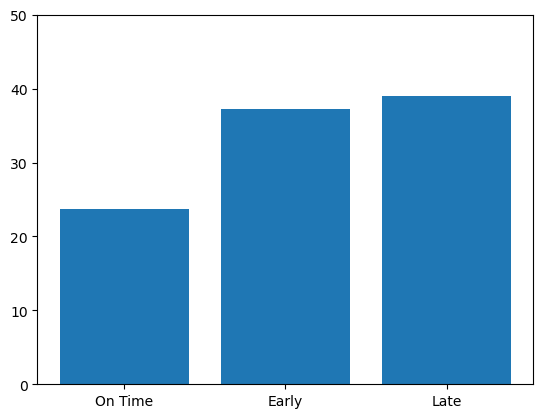

In [105]:
arrival_status_pct = pd.DataFrame(data={'Arrival_Status': ['On Time', 'Early', 'Late'],'Percentage':[on_time_pct,early_pct,late_pct]})
x = arrival_status_pct['Arrival_Status']
y = arrival_status_pct['Percentage']
plt.bar(x,y)
plt.ylim(0,50);

### Questions I'm wondering

1. Does the operator impact the timeliness of the bus arrival 

2. When early typically how early

In [44]:
headway_df.isna().sum()

CALENDAR_ID                      0
SERVICE_ABBR                     0
ADHERENCE_ID                     0
DATE                             0
ROUTE_ABBR                       0
BLOCK_ABBR                       0
OPERATOR                         0
TRIP_ID                          0
OVERLOAD_ID                      0
ROUTE_DIRECTION_NAME             0
TIME_POINT_ABBR                  0
ROUTE_STOP_SEQUENCE             11
TRIP_EDGE                        0
LATITUDE                         0
LONGITUDE                        0
SCHEDULED_TIME                   0
ACTUAL_ARRIVAL_TIME          11459
ACTUAL_DEPARTURE_TIME        11468
ADHERENCE                    11468
SCHEDULED_HDWY               75591
ACTUAL_HDWY                  84267
HDWY_DEV                     84436
ADJUSTED_EARLY_COUNT             0
ADJUSTED_LATE_COUNT              0
ADJUSTED_ONTIME_COUNT            0
STOP_CANCELLED                   0
PREV_SCHED_STOP_CANCELLED    70329
IS_RELIEF                        0
BLOCK_STOP_ORDER    

### Goals of Exploration

1. How much impact does being late or too spaced out at the first stop have downstream?

2. What is the impact of the layover at the start of the trip (the difference between the first top arrival and departure time) Does more layover lead to more stable headways (lower values for % headway deviation)?

3. How closely does lateness (ADHERENCE) correlate to headway?

4. What is the relationship between distance or time travelled since the start of a given trip and the headway deviation? Does headway become less stable the further along the route the bus has travelled?

5. How much of a factor does the driver have on headway and on-time performance? The driver is indicated by the OPERATOR variable.

6. How does direction of travel, route, or location affect the headway and on-time performance?

7. How does time of day or day of week affect headway and on-time performance? Can you detect an impact of school schedule on headway deviation (for certain routes and at certain times of day)?

8. Does weather have any effect on headway or on-time performance? To help answer this question, the file bna_weather.csv contains historical weather data recorded at Nashville International Airport.